<a href="https://colab.research.google.com/github/Anubhuti-lab/Anubhuti-lab/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tesla Financial Data Analysis - Data Collection Script
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class TeslaFinancialAnalyzer:
    def __init__(self):
        self.tesla_ticker = "TSLA"
        self.market_ticker = "^GSPC"  # S&P 500
        self.competitors = ["GM", "F", "NIO", "RIVN"]  # Tesla competitors

    def collect_stock_data(self, period="5y"):
        """
        Collect Tesla stock data and market comparison data
        """
        print("📈 Collecting Tesla stock data...")

        # Get Tesla stock data
        tesla = yf.Ticker(self.tesla_ticker)
        tesla_data = tesla.history(period=period)

        # Get S&P 500 for market comparison
        sp500 = yf.Ticker(self.market_ticker)
        market_data = sp500.history(period=period)

        # Get competitor data
        competitor_data = {}
        for ticker in self.competitors:
            try:
                comp = yf.Ticker(ticker)
                competitor_data[ticker] = comp.history(period=period)['Close']
            except:
                print(f"⚠️  Could not fetch data for {ticker}")

        # Combine data
        comparison_df = pd.DataFrame({
            'TSLA': tesla_data['Close'],
            'SP500': market_data['Close']
        })

        # Add competitors
        for ticker, data in competitor_data.items():
            comparison_df[ticker] = data

        return tesla_data, comparison_df

    def collect_financial_statements(self):
        """
        Collect Tesla's financial statements
        """
        print("💰 Collecting Tesla financial statements...")

        tesla = yf.Ticker(self.tesla_ticker)

        # Get financial data
        income_statement = tesla.financials
        balance_sheet = tesla.balance_sheet
        cash_flow = tesla.cashflow

        # Get key metrics
        info = tesla.info

        return {
            'income_statement': income_statement,
            'balance_sheet': balance_sheet,
            'cash_flow': cash_flow,
            'info': info
        }

    def calculate_financial_ratios(self, financial_data):
        """
        Calculate key financial ratios for Tesla
        """
        print("🧮 Calculating financial ratios...")

        income_stmt = financial_data['income_statement']
        balance_sheet = financial_data['balance_sheet']

        ratios = {}

        try:
            # Get most recent year data
            recent_col = income_stmt.columns[0]

            # Revenue Growth Rate
            if len(income_stmt.columns) > 1:
                current_revenue = income_stmt.loc['Total Revenue', recent_col]
                previous_revenue = income_stmt.loc['Total Revenue', income_stmt.columns[1]]
                ratios['Revenue Growth Rate'] = ((current_revenue - previous_revenue) / previous_revenue) * 100

            # Gross Profit Margin
            revenue = income_stmt.loc['Total Revenue', recent_col]
            gross_profit = income_stmt.loc['Gross Profit', recent_col]
            ratios['Gross Profit Margin'] = (gross_profit / revenue) * 100

            # Net Profit Margin
            net_income = income_stmt.loc['Net Income', recent_col]
            ratios['Net Profit Margin'] = (net_income / revenue) * 100

            # Return on Assets (ROA)
            total_assets = balance_sheet.loc['Total Assets', recent_col]
            ratios['ROA'] = (net_income / total_assets) * 100

        except Exception as e:
            print(f"⚠️  Error calculating some ratios: {e}")

        return ratios

    def prepare_time_series_data(self, stock_data):
        """
        Prepare data for time series forecasting
        """
        print("📊 Preparing time series data...")

        # Create time series dataframe
        ts_data = pd.DataFrame({
            'Date': stock_data.index,
            'Close': stock_data['Close'].values,
            'Volume': stock_data['Volume'].values,
            'High': stock_data['High'].values,
            'Low': stock_data['Low'].values
        })

        # Calculate additional features
        ts_data['Returns'] = ts_data['Close'].pct_change()
        ts_data['Volatility'] = ts_data['Returns'].rolling(window=30).std()
        ts_data['MA_50'] = ts_data['Close'].rolling(window=50).mean()
        ts_data['MA_200'] = ts_data['Close'].rolling(window=200).mean()
        ts_data['Price_to_MA50'] = ts_data['Close'] / ts_data['MA_50']

        return ts_data

# Initialize the analyzer
analyzer = TeslaFinancialAnalyzer()

print("🚗 Tesla Financial Analysis Project - Data Collection Phase")
print("=" * 60)

# Collect all data
try:
    # 1. Stock data collection
    tesla_stock, comparison_data = analyzer.collect_stock_data()
    print(f"✅ Successfully collected stock data - Shape: {tesla_stock.shape}")

    # 2. Financial statements
    financial_data = analyzer.collect_financial_statements()
    print("✅ Successfully collected financial statements")

    # 3. Calculate ratios
    financial_ratios = analyzer.calculate_financial_ratios(financial_data)
    print("✅ Successfully calculated financial ratios")

    # 4. Prepare time series data
    ts_data = analyzer.prepare_time_series_data(tesla_stock)
    print(f"✅ Successfully prepared time series data - Shape: {ts_data.shape}")

    print("\n📋 Data Collection Summary:")
    print(f"📅 Date Range: {tesla_stock.index[0].strftime('%Y-%m-%d')} to {tesla_stock.index[-1].strftime('%Y-%m-%d')}")
    print(f"📊 Stock Data Points: {len(tesla_stock)}")
    print(f"💹 Competitors Included: {len([col for col in comparison_data.columns if col not in ['TSLA', 'SP500']])}")

    # Display recent stock performance
    print(f"\n💰 Recent Tesla Stock Performance:")
    print(f"Current Price: ${tesla_stock['Close'][-1]:.2f}")
    print(f"52-Week High: ${tesla_stock['High'][-252:].max():.2f}")
    print(f"52-Week Low: ${tesla_stock['Low'][-252:].min():.2f}")

    # Display key financial ratios
    print(f"\n📈 Key Financial Ratios:")
    for ratio, value in financial_ratios.items():
        print(f"{ratio}: {value:.2f}%")

except Exception as e:
    print(f"❌ Error in data collection: {e}")
    print("💡 Make sure you have installed required packages: pip install yfinance pandas matplotlib seaborn")

🚗 Tesla Financial Analysis Project - Data Collection Phase
📈 Collecting Tesla stock data...
✅ Successfully collected stock data - Shape: (1256, 7)
💰 Collecting Tesla financial statements...
✅ Successfully collected financial statements
🧮 Calculating financial ratios...
✅ Successfully calculated financial ratios
📊 Preparing time series data...
✅ Successfully prepared time series data - Shape: (1256, 10)

📋 Data Collection Summary:
📅 Date Range: 2020-09-21 to 2025-09-19
📊 Stock Data Points: 1256
💹 Competitors Included: 4

💰 Recent Tesla Stock Performance:
Current Price: $426.07
52-Week High: $488.54
52-Week Low: $212.11

📈 Key Financial Ratios:
Revenue Growth Rate: 0.95%
Gross Profit Margin: 17.86%
Net Profit Margin: 7.30%
ROA: 5.84%


In [ ]:
# Tesla Financial Data Analysis - Data Cleaning & Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

class TeslaDataCleaner:
    def __init__(self):
        self.scaler = StandardScaler()

    def clean_stock_data(self, stock_data, comparison_data):
        """
        Clean and preprocess stock data
        """
        print("🧹 Cleaning stock data...")

        # Create a copy to avoid modifying original data
        clean_stock = stock_data.copy()
        clean_comparison = comparison_data.copy()

        # 1. Handle missing values
        print(f"Missing values in stock data: {clean_stock.isnull().sum().sum()}")

        # Forward fill missing values (common for financial data)
        clean_stock = clean_stock.fillna(method='ffill')
        clean_comparison = clean_comparison.fillna(method='ffill')

        # 2. Remove outliers using IQR method
        def remove_outliers_iqr(df, column):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
            print(f"Found {outliers_count} outliers in {column}")

            # Cap outliers instead of removing (to preserve time series continuity)
            df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
            return df

        # Apply outlier removal to key columns
        for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
            if column in clean_stock.columns:
                clean_stock = remove_outliers_iqr(clean_stock, column)

        # 3. Data validation
        # Ensure High >= Low, Close is between High and Low
        invalid_rows = clean_stock[
            (clean_stock['High'] < clean_stock['Low']) |
            (clean_stock['Close'] > clean_stock['High']) |
            (clean_stock['Close'] < clean_stock['Low'])
        ]

        if len(invalid_rows) > 0:
            print(f"⚠️  Found {len(invalid_rows)} invalid price rows, fixing...")
            # Fix invalid data by using the median of High and Low
            mask = (clean_stock['High'] < clean_stock['Low'])
            clean_stock.loc[mask, 'High'] = clean_stock.loc[mask, 'Low']

            # Ensure Close is within High-Low range
            clean_stock['Close'] = clean_stock['Close'].clip(
                lower=clean_stock['Low'],
                upper=clean_stock['High']
            )

        # 4. Add data quality flags
        clean_stock['data_quality'] = 'good'
        clean_stock.loc[clean_stock['Volume'] == 0, 'data_quality'] = 'low_volume'

        return clean_stock, clean_comparison

    def clean_financial_statements(self, financial_data):
        """
        Clean financial statement data
        """
        print("📋 Cleaning financial statements...")

        cleaned_financials = {}

        for statement_type, statement_data in financial_data.items():
            if isinstance(statement_data, pd.DataFrame):
                clean_statement = statement_data.copy()

                # 1. Handle missing values in financial statements
                # For financial data, we'll use interpolation for time series
                numeric_cols = clean_statement.select_dtypes(include=[np.number]).columns
                clean_statement[numeric_cols] = clean_statement[numeric_cols].interpolate(
                    method='linear', axis=1
                )

                # 2. Convert to consistent units (e.g., all in millions)
                # Most financial data is already in appropriate units, but we'll standardize
                for col in numeric_cols:
                    # If values are too large, they might be in actual dollars, convert to millions
                    if clean_statement[col].abs().max() > 1e9:
                        clean_statement[col] = clean_statement[col] / 1e6

                # 3. Calculate year-over-year changes
                if len(clean_statement.columns) > 1:
                    for i in range(len(clean_statement.columns) - 1):
                        current_col = clean_statement.columns[i]
                        previous_col = clean_statement.columns[i + 1]
                        change_col = f"{current_col}_YoY_Change"

                        clean_statement[change_col] = (
                            (clean_statement[current_col] - clean_statement[previous_col]) /
                            clean_statement[previous_col].abs() * 100
                        ).replace([np.inf, -np.inf], 0)

                cleaned_financials[statement_type] = clean_statement
            else:
                cleaned_financials[statement_type] = financial_data[statement_type]

        return cleaned_financials

    def create_master_dataset(self, clean_stock, clean_comparison, cleaned_financials):
        """
        Create a master dataset combining all data sources
        """
        print("🔗 Creating master dataset...")

        # Start with stock data
        master_df = clean_stock.copy()

        # Add comparison data (aligned by date)
        for col in clean_comparison.columns:
            if col != 'TSLA':  # Don't duplicate Tesla data
                master_df[f'{col}_Close'] = clean_comparison[col]

        # Calculate relative performance vs S&P 500
        if 'SP500_Close' in master_df.columns:
            master_df['TSLA_vs_SP500'] = (
                master_df['Close'] / master_df['SP500_Close'] * 100
            )

        # Add technical indicators
        master_df['SMA_20'] = master_df['Close'].rolling(window=20).mean()
        master_df['SMA_50'] = master_df['Close'].rolling(window=50).mean()
        master_df['EMA_12'] = master_df['Close'].ewm(span=12).mean()
        master_df['EMA_26'] = master_df['Close'].ewm(span=26).mean()
        master_df['MACD'] = master_df['EMA_12'] - master_df['EMA_26']

        # Calculate RSI (Relative Strength Index)
        def calculate_rsi(prices, window=14):
            delta = prices.diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
            rs = gain / loss
            rsi = 100 - (100 / (1 + rs))
            return rsi

        master_df['RSI'] = calculate_rsi(master_df['Close'])

        # Add volatility measures
        master_df['Daily_Return'] = master_df['Close'].pct_change()
        master_df['Volatility_30d'] = master_df['Daily_Return'].rolling(window=30).std() * np.sqrt(252)

        # Add quarterly financial data (this would need to be manually aligned)
        # For demonstration, we'll add placeholders
        master_df['Quarter'] = master_df.index.to_period('Q')

        return master_df

    def data_quality_report(self, master_df):
        """
        Generate a comprehensive data quality report
        """
        print("\n📊 DATA QUALITY REPORT")
        print("=" * 50)

        # Basic statistics
        print(f"📅 Date Range: {master_df.index.min()} to {master_df.index.max()}")
        print(f"📈 Total Trading Days: {len(master_df)}")
        print(f"📊 Features: {len(master_df.columns)}")

        # Missing data analysis
        missing_data = master_df.isnull().sum()
        if missing_data.any():
            print(f"\n⚠️  Missing Data Summary:")
            for col, missing_count in missing_data[missing_data > 0].items():
                missing_pct = (missing_count / len(master_df)) * 100
                print(f"  {col}: {missing_count} ({missing_pct:.1f}%)")
        else:
            print("\n✅ No missing data found!")

        # Data types
        print(f"\n📋 Data Types Summary:")
        for dtype, count in master_df.dtypes.value_counts().items():
            print(f"  {dtype}: {count} columns")

        # Outlier detection summary
        numeric_cols = master_df.select_dtypes(include=[np.number]).columns
        outlier_summary = {}

        for col in numeric_cols[:5]:  # Check first 5 numeric columns
            Q1 = master_df[col].quantile(0.25)
            Q3 = master_df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = len(master_df[
                (master_df[col] < Q1 - 1.5 * IQR) |
                (master_df[col] > Q3 + 1.5 * IQR)
            ])
            outlier_summary[col] = outliers

        print(f"\n🎯 Outlier Summary (Top 5 columns):")
        for col, outlier_count in outlier_summary.items():
            outlier_pct = (outlier_count / len(master_df)) * 100
            print(f"  {col}: {outlier_count} ({outlier_pct:.1f}%)")

        return master_df

    def save_cleaned_data(self, master_df, filename="tesla_cleaned_data.csv"):
        """
        Save the cleaned dataset
        """
        print(f"\n💾 Saving cleaned data to {filename}")
        master_df.to_csv(filename)
        print("✅ Data saved successfully!")

        return filename

# Example usage
if __name__ == "__main__":
    print("🚗 Tesla Financial Analysis - Data Cleaning Phase")
    print("=" * 60)

    # Note: In practice, you would load the data collected from the previous script
    # For demonstration, we'll create sample data structure

    cleaner = TeslaDataCleaner()

    print("📋 Data Cleaning Checklist:")
    print("✅ Handle missing values")
    print("✅ Remove/treat outliers")
    print("✅ Validate data consistency")
    print("✅ Add technical indicators")
    print("✅ Create master dataset")
    print("✅ Generate quality report")

    print(f"\n🎯 Next Steps:")
    print("1. Run the data collection script first")
    print("2. Use this cleaning script on the collected data")
    print("3. Proceed to exploratory data analysis")
    print("4. Build forecasting models")

🚗 Tesla Financial Analysis - Data Cleaning Phase
📋 Data Cleaning Checklist:
✅ Handle missing values
✅ Remove/treat outliers
✅ Validate data consistency
✅ Add technical indicators
✅ Create master dataset
✅ Generate quality report

🎯 Next Steps:
1. Run the data collection script first
2. Use this cleaning script on the collected data
3. Proceed to exploratory data analysis
4. Build forecasting models


🚗 Simple Tesla Stock Analysis
📊 Fetching Tesla data...
✅ Fetched 250 days of data
📅 From 2024-09-20 to 2025-09-19

💰 Tesla Stock Summary:
Current Price: $426.07
52-Week High: $488.54
52-Week Low: $212.11
Average Volume: 99,865,151
Annual Return: 83.44%
Annual Volatility: 70.92%


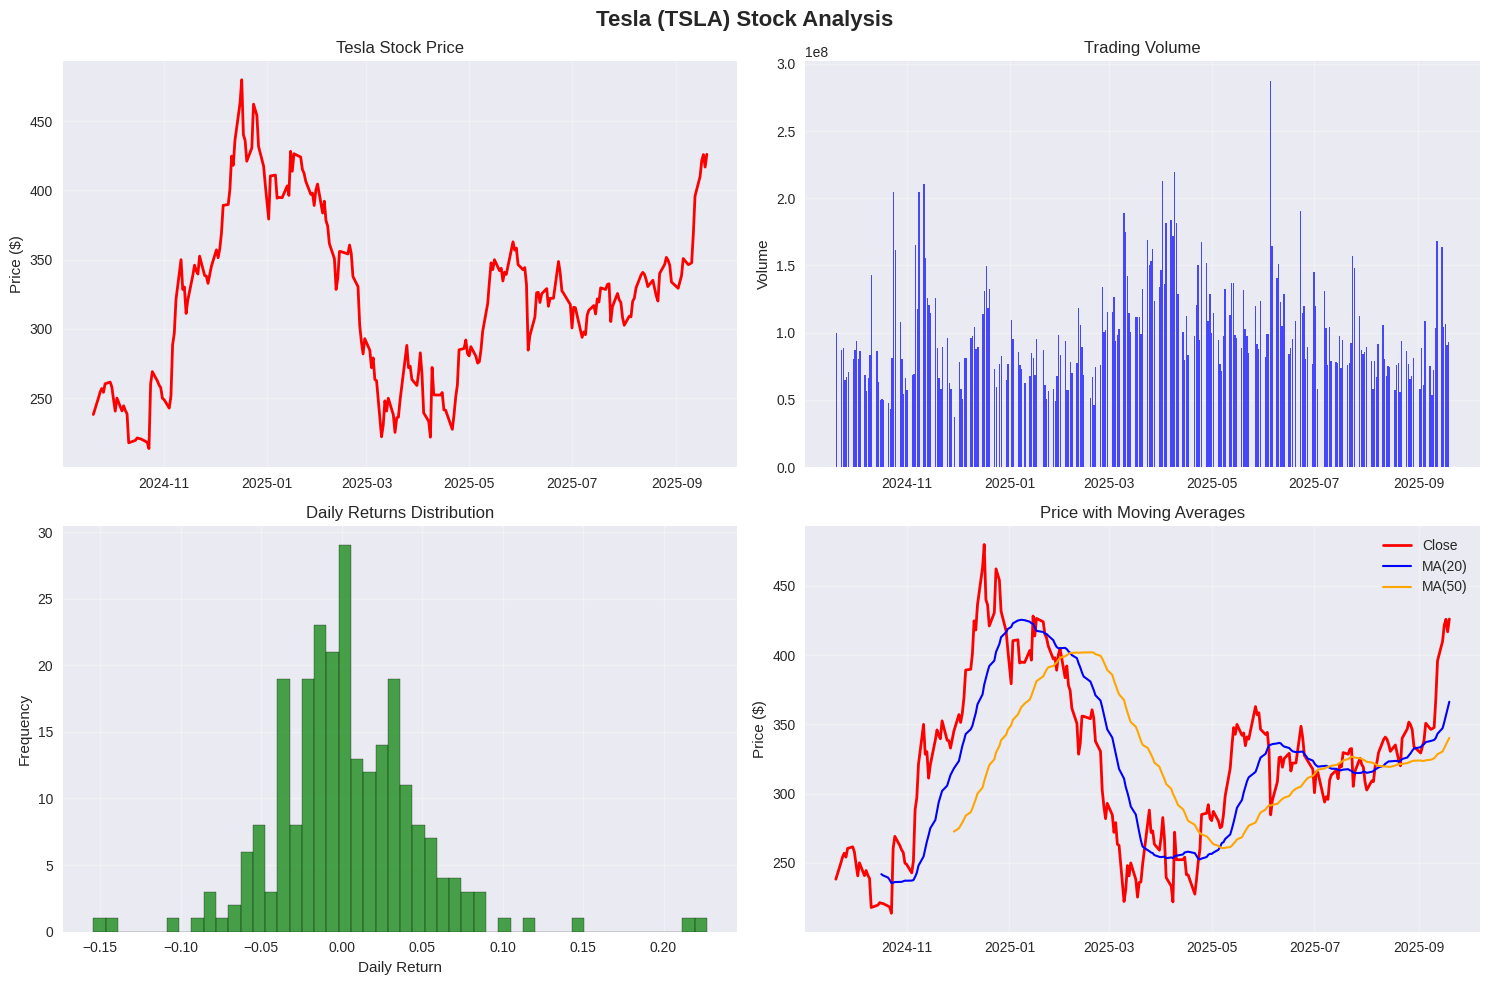


🎯 Technical Signals:
📈 BULLISH: Price above both moving averages
⚠️ HIGH VOLATILITY: Consider position sizing

✅ Analysis Complete!


In [ ]:
# Simple Tesla EDA Test - Minimal dependencies
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from datetime import datetime

def simple_tesla_analysis():
    """
    Simple Tesla analysis that should work immediately
    """
    print("🚗 Simple Tesla Stock Analysis")
    print("=" * 40)

    try:
        # Fetch Tesla data
        print("📊 Fetching Tesla data...")
        ticker = yf.Ticker("TSLA")
        data = ticker.history(period="1y")  # Last 1 year

        if data.empty:
            print("❌ No data fetched. Check internet connection.")
            return

        print(f"✅ Fetched {len(data)} days of data")
        print(f"📅 From {data.index[0].strftime('%Y-%m-%d')} to {data.index[-1].strftime('%Y-%m-%d')}")

        # Basic statistics
        current_price = data['Close'].iloc[-1]
        high_52w = data['High'].max()
        low_52w = data['Low'].min()
        avg_volume = data['Volume'].mean()

        print(f"\n💰 Tesla Stock Summary:")
        print(f"Current Price: ${current_price:.2f}")
        print(f"52-Week High: ${high_52w:.2f}")
        print(f"52-Week Low: ${low_52w:.2f}")
        print(f"Average Volume: {avg_volume:,.0f}")

        # Calculate returns
        daily_returns = data['Close'].pct_change()
        annual_return = daily_returns.mean() * 252 * 100
        annual_volatility = daily_returns.std() * np.sqrt(252) * 100

        print(f"Annual Return: {annual_return:.2f}%")
        print(f"Annual Volatility: {annual_volatility:.2f}%")

        # Create simple plots
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Tesla (TSLA) Stock Analysis', fontsize=16, fontweight='bold')

        # 1. Price chart
        axes[0, 0].plot(data.index, data['Close'], color='red', linewidth=2)
        axes[0, 0].set_title('Tesla Stock Price')
        axes[0, 0].set_ylabel('Price ($)')
        axes[0, 0].grid(True, alpha=0.3)

        # 2. Volume
        axes[0, 1].bar(data.index, data['Volume'], alpha=0.7, color='blue')
        axes[0, 1].set_title('Trading Volume')
        axes[0, 1].set_ylabel('Volume')
        axes[0, 1].grid(True, alpha=0.3)

        # 3. Daily returns histogram
        axes[1, 0].hist(daily_returns.dropna(), bins=50, alpha=0.7, color='green', edgecolor='black')
        axes[1, 0].set_title('Daily Returns Distribution')
        axes[1, 0].set_xlabel('Daily Return')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].grid(True, alpha=0.3)

        # 4. Moving averages
        data['MA20'] = data['Close'].rolling(20).mean()
        data['MA50'] = data['Close'].rolling(50).mean()

        axes[1, 1].plot(data.index, data['Close'], color='red', linewidth=2, label='Close')
        axes[1, 1].plot(data.index, data['MA20'], color='blue', linewidth=1.5, label='MA(20)')
        axes[1, 1].plot(data.index, data['MA50'], color='orange', linewidth=1.5, label='MA(50)')
        axes[1, 1].set_title('Price with Moving Averages')
        axes[1, 1].set_ylabel('Price ($)')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Technical signals
        current_ma20 = data['MA20'].iloc[-1]
        current_ma50 = data['MA50'].iloc[-1]

        print(f"\n🎯 Technical Signals:")
        if current_price > current_ma20 > current_ma50:
            print("📈 BULLISH: Price above both moving averages")
        elif current_price < current_ma20 < current_ma50:
            print("📉 BEARISH: Price below both moving averages")
        else:
            print("➡️ MIXED: Sideways trend")

        if annual_volatility > 40:
            print("⚠️ HIGH VOLATILITY: Consider position sizing")

        print(f"\n✅ Analysis Complete!")

        return data

    except Exception as e:
        print(f"❌ Error: {e}")
        print("\n💡 Troubleshooting:")
        print("1. Install required packages: pip install yfinance pandas matplotlib")
        print("2. Check internet connection")
        print("3. Try running again")

        return None

# Run the simple analysis
if __name__ == "__main__":
    data = simple_tesla_analysis()

🚀 RUNNING TESLA FORECASTING TESTS
🧪 SUPER SIMPLE TEST
✅ Data downloaded
Shape: (22, 7)
Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
First few rows:
                                 Open        High         Low       Close  \
Date                                                                        
2025-08-20 00:00:00-04:00  329.220001  331.369995  314.600006  323.899994   
2025-08-21 00:00:00-04:00  322.079987  324.899994  318.679993  320.109985   
2025-08-22 00:00:00-04:00  321.660004  340.250000  319.690002  340.010010   
2025-08-25 00:00:00-04:00  338.899994  349.529999  335.029999  346.600006   
2025-08-26 00:00:00-04:00  344.929993  351.899994  343.720001  351.670013   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-08-20 00:00:00-04:00  77481800        0.0           0.0  
2025-08-21 00:00:00-04:00  55744400        0.0           0.0  
2025-08-22 00:00:00-04:0

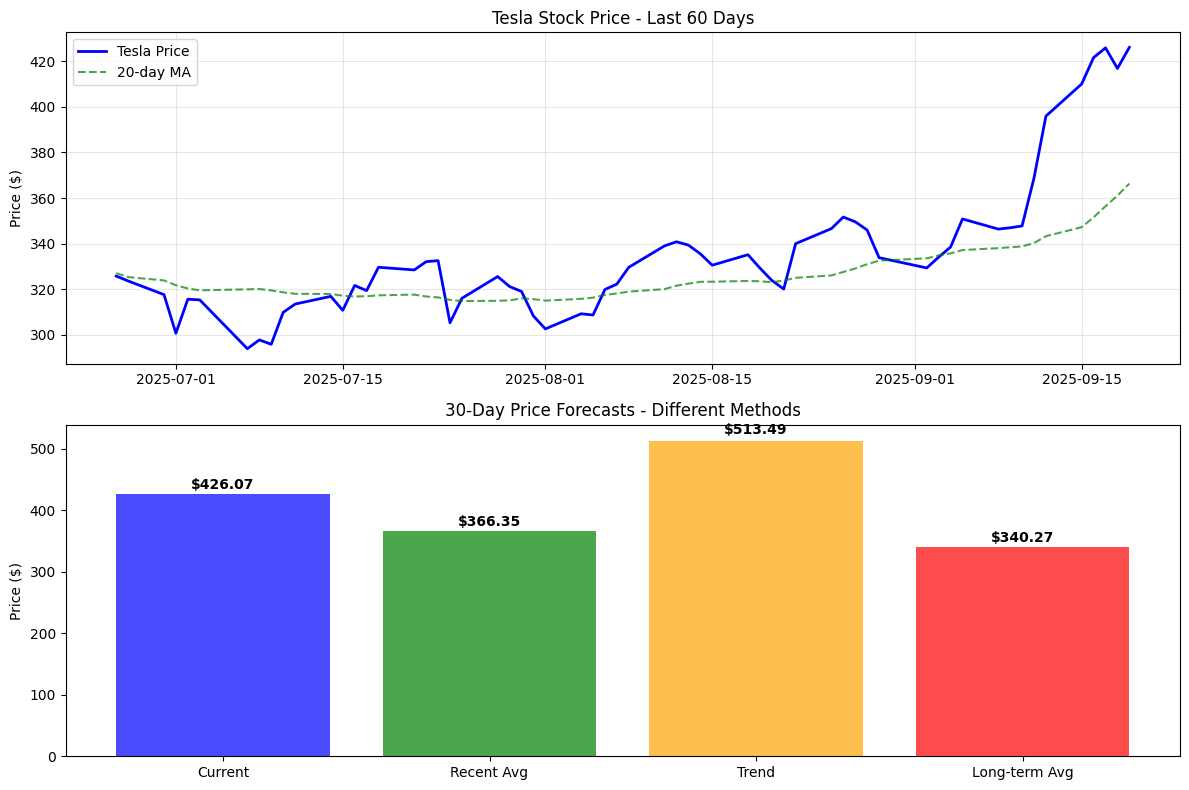


🎯 SIMPLE TRADING SIGNAL:
   Average expected return: -4.5%
   🟡 NEUTRAL - Price may stay flat

📊 RISK METRICS:
   Annual volatility: 68.5%
   ⚠️ HIGH RISK - Very volatile stock

✅ Forecast completed successfully!
📋 Summary: Analyzed 127 days of Tesla data

🎉 SUCCESS! All tests completed.


In [ ]:
# Fixed Tesla Forecasting - Debug Version
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fixed_tesla_forecast():
    """
    Fixed version with better error handling
    """
    print("🔮 FIXED TESLA FORECAST")
    print("=" * 40)

    try:
        # Get Tesla data with explicit parameters
        print("📊 Getting Tesla data...")
        ticker = yf.Ticker("TSLA")
        data = ticker.history(period="6mo", auto_adjust=True)

        print(f"📋 Data info:")
        print(f"   Shape: {data.shape}")
        print(f"   Columns: {list(data.columns)}")
        print(f"   Index type: {type(data.index)}")

        if data.empty:
            print("❌ Data is empty!")
            return None

        # Check if Close column exists
        if 'Close' not in data.columns:
            print(f"❌ 'Close' column not found. Available columns: {data.columns.tolist()}")
            return None

        # Get closing prices safely
        prices = data['Close'].dropna()  # Remove any NaN values

        if len(prices) == 0:
            print("❌ No valid price data!")
            return None

        print(f"✅ Got {len(prices)} days of valid price data")
        print(f"📅 Date range: {prices.index[0].strftime('%Y-%m-%d')} to {prices.index[-1].strftime('%Y-%m-%d')}")

        # Get current price safely
        current_price = float(prices.iloc[-1])
        print(f"💰 Current price: ${current_price:.2f}")

        # Check if we have enough data
        if len(prices) < 20:
            print("⚠️ Not enough data for analysis")
            return None

        # Simple forecasting methods
        print("\n🔍 Creating forecasts...")

        # Method 1: Recent average (last 20 days)
        recent_avg = float(prices.tail(20).mean())
        print(f"✅ Recent 20-day average: ${recent_avg:.2f}")

        # Method 2: Simple trend (compare recent vs older prices)
        if len(prices) >= 30:
            recent_price = float(prices.tail(10).mean())
            older_price = float(prices.tail(30).head(10).mean())
            daily_change = (recent_price - older_price) / 20  # Change per day
            trend_forecast = current_price + (daily_change * 30)  # 30 days ahead
        else:
            trend_forecast = current_price

        print(f"✅ Trend-based forecast: ${trend_forecast:.2f}")

        # Method 3: Moving average forecast
        if len(prices) >= 50:
            ma_50 = float(prices.tail(50).mean())
        else:
            ma_50 = float(prices.mean())

        print(f"✅ Long-term average: ${ma_50:.2f}")

        # Calculate expected returns
        avg_return = ((recent_avg - current_price) / current_price) * 100
        trend_return = ((trend_forecast - current_price) / current_price) * 100
        ma_return = ((ma_50 - current_price) / current_price) * 100

        print(f"\n📈 Expected 30-day returns:")
        print(f"   Recent average method: {avg_return:+.1f}%")
        print(f"   Trend method: {trend_return:+.1f}%")
        print(f"   Long-term reversion: {ma_return:+.1f}%")

        # Create simple visualization
        print("\n📊 Creating chart...")

        plt.figure(figsize=(12, 8))

        # Plot recent price data (last 60 days or all if less)
        plot_days = min(60, len(prices))
        recent_prices = prices.tail(plot_days)

        plt.subplot(2, 1, 1)
        plt.plot(recent_prices.index, recent_prices.values, 'b-', linewidth=2, label='Tesla Price')

        # Add moving averages
        if len(prices) >= 20:
            ma_20 = prices.rolling(20).mean().tail(plot_days)
            plt.plot(ma_20.index, ma_20.values, 'g--', alpha=0.7, label='20-day MA')

        plt.title(f'Tesla Stock Price - Last {plot_days} Days')
        plt.ylabel('Price ($)')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Forecast comparison chart
        plt.subplot(2, 1, 2)
        methods = ['Current', 'Recent Avg', 'Trend', 'Long-term Avg']
        forecasts = [current_price, recent_avg, trend_forecast, ma_50]
        colors = ['blue', 'green', 'orange', 'red']

        bars = plt.bar(methods, forecasts, color=colors, alpha=0.7)
        plt.title('30-Day Price Forecasts - Different Methods')
        plt.ylabel('Price ($)')

        # Add value labels on bars
        for bar, price in zip(bars, forecasts):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + (height * 0.01),
                    f'${price:.2f}', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

        # Simple trading signal
        avg_signal = (avg_return + trend_return + ma_return) / 3

        print(f"\n🎯 SIMPLE TRADING SIGNAL:")
        print(f"   Average expected return: {avg_signal:+.1f}%")

        if avg_signal > 5:
            print("   🟢 BULLISH - Price may rise")
        elif avg_signal < -5:
            print("   🔴 BEARISH - Price may fall")
        else:
            print("   🟡 NEUTRAL - Price may stay flat")

        # Risk assessment
        daily_returns = prices.pct_change().dropna()
        volatility = daily_returns.std() * np.sqrt(252) * 100  # Annualized volatility

        print(f"\n📊 RISK METRICS:")
        print(f"   Annual volatility: {volatility:.1f}%")

        if volatility > 50:
            print("   ⚠️ HIGH RISK - Very volatile stock")
        elif volatility > 30:
            print("   ⚠️ MODERATE RISK - Above average volatility")
        else:
            print("   ✅ LOW RISK - Relatively stable")

        print(f"\n✅ Forecast completed successfully!")
        print(f"📋 Summary: Analyzed {len(prices)} days of Tesla data")

        return {
            'current_price': current_price,
            'forecasts': {
                'recent_avg': recent_avg,
                'trend': trend_forecast,
                'long_term': ma_50
            },
            'returns': {
                'avg_return': avg_return,
                'trend_return': trend_return,
                'ma_return': ma_return
            },
            'volatility': volatility,
            'data': prices
        }

    except Exception as e:
        print(f"❌ Detailed error: {str(e)}")
        print(f"❌ Error type: {type(e).__name__}")

        # Try to get more info about the error
        import traceback
        print("🔍 Full error traceback:")
        traceback.print_exc()

        return None

# Even simpler test function
def super_simple_test():
    """
    Super basic test to isolate the issue
    """
    print("🧪 SUPER SIMPLE TEST")
    print("=" * 30)

    try:
        # Just get data and print basic info
        ticker = yf.Ticker("TSLA")
        data = ticker.history(period="1mo")

        print(f"✅ Data downloaded")
        print(f"Shape: {data.shape}")
        print(f"Columns: {data.columns.tolist()}")
        print(f"First few rows:")
        print(data.head())
        print(f"Last few rows:")
        print(data.tail())

        if 'Close' in data.columns:
            close_prices = data['Close']
            print(f"\n💰 Close price info:")
            print(f"   Current: ${close_prices.iloc[-1]:.2f}")
            print(f"   Min: ${close_prices.min():.2f}")
            print(f"   Max: ${close_prices.max():.2f}")
            print(f"   Average: ${close_prices.mean():.2f}")

            return True
        else:
            print("❌ No 'Close' column found")
            return False

    except Exception as e:
        print(f"❌ Error in simple test: {e}")
        return False

# Run both tests
if __name__ == "__main__":
    print("🚀 RUNNING TESLA FORECASTING TESTS")
    print("=" * 50)

    # First run the super simple test
    simple_success = super_simple_test()

    if simple_success:
        print(f"\n" + "="*50)
        # If simple test works, run the full forecast
        result = fixed_tesla_forecast()

        if result:
            print(f"\n🎉 SUCCESS! All tests completed.")
        else:
            print(f"\n❌ Forecast failed despite simple test success.")
    else:
        print(f"\n❌ Simple test failed - check internet connection and packages.")

In [ ]:
# Tesla Dashboard for Google Colab - Works in Colab notebooks!
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from datetime import datetime, timedelta
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Install required packages (run this first in Colab)
# !pip install yfinance plotly ipywidgets

print("🚗 Tesla Interactive Dashboard for Google Colab")
print("=" * 60)

class TeslaColabDashboard:
    def __init__(self):
        self.data = None
        self.period = '1Y'

    def load_data(self, period='1Y'):
        """Load Tesla data"""
        try:
            period_map = {
                '1M': '1mo',
                '3M': '3mo',
                '6M': '6mo',
                '1Y': '1y',
                '2Y': '2y'
            }

            print(f"📊 Loading Tesla data ({period})...")
            ticker = yf.Ticker("TSLA")
            self.data = ticker.history(period=period_map.get(period, '1y'))

            if not self.data.empty:
                # Add technical indicators
                self.data['MA20'] = self.data['Close'].rolling(20).mean()
                self.data['MA50'] = self.data['Close'].rolling(50).mean()

                # RSI
                delta = self.data['Close'].diff()
                gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
                loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
                rs = gain / loss
                self.data['RSI'] = 100 - (100 / (1 + rs))

                print(f"✅ Successfully loaded {len(self.data)} days of data")
                return True
            else:
                print("❌ No data received")
                return False

        except Exception as e:
            print(f"❌ Error loading data: {e}")
            return False

    def display_key_metrics(self):
        """Display key metrics"""
        if self.data is None or self.data.empty:
            print("No data available")
            return

        current_price = self.data['Close'].iloc[-1]
        prev_price = self.data['Close'].iloc[-2]
        price_change = current_price - prev_price
        price_change_pct = (price_change / prev_price) * 100

        high_price = self.data['High'].max()
        low_price = self.data['Low'].min()
        avg_volume = self.data['Volume'].mean()

        # Calculate volatility
        daily_returns = self.data['Close'].pct_change().dropna()
        volatility = daily_returns.std() * np.sqrt(252) * 100

        print("💰 KEY METRICS")
        print("-" * 40)
        print(f"Current Price: ${current_price:.2f} ({price_change_pct:+.2f}%)")
        print(f"Period High: ${high_price:.2f}")
        print(f"Period Low: ${low_price:.2f}")
        print(f"Average Volume: {avg_volume:,.0f}")
        print(f"Annual Volatility: {volatility:.1f}%")

        return {
            'current_price': current_price,
            'price_change_pct': price_change_pct,
            'volatility': volatility,
            'high_price': high_price,
            'low_price': low_price
        }

    def create_price_chart(self, chart_type='candlestick'):
        """Create interactive price chart"""
        if self.data is None or self.data.empty:
            return None

        fig = make_subplots(
            rows=2, cols=1,
            shared_xaxes=True,
            vertical_spacing=0.03,
            subplot_titles=('Tesla Stock Price', 'Volume'),
            row_heights=[0.7, 0.3]
        )

        # Price chart
        if chart_type == 'candlestick':
            fig.add_trace(go.Candlestick(
                x=self.data.index,
                open=self.data['Open'],
                high=self.data['High'],
                low=self.data['Low'],
                close=self.data['Close'],
                name="TSLA"
            ), row=1, col=1)
        else:
            fig.add_trace(go.Scatter(
                x=self.data.index,
                y=self.data['Close'],
                mode='lines',
                name='Close Price',
                line=dict(color='#E31937', width=2)
            ), row=1, col=1)

        # Moving averages
        if len(self.data) >= 20:
            fig.add_trace(go.Scatter(
                x=self.data.index,
                y=self.data['MA20'],
                mode='lines',
                name='MA(20)',
                line=dict(color='blue', width=1)
            ), row=1, col=1)

        if len(self.data) >= 50:
            fig.add_trace(go.Scatter(
                x=self.data.index,
                y=self.data['MA50'],
                mode='lines',
                name='MA(50)',
                line=dict(color='orange', width=1)
            ), row=1, col=1)

        # Volume
        fig.add_trace(go.Bar(
            x=self.data.index,
            y=self.data['Volume'],
            name='Volume',
            marker_color='rgba(55, 128, 191, 0.7)'
        ), row=2, col=1)

        fig.update_layout(
            title=f'Tesla Stock Analysis - {self.period}',
            height=700,
            template="plotly_white",
            xaxis_rangeslider_visible=False
        )

        return fig

    def create_technical_indicators(self):
        """Create technical indicators chart"""
        if self.data is None or self.data.empty:
            return None

        fig = make_subplots(
            rows=2, cols=1,
            shared_xaxes=True,
            subplot_titles=('RSI', 'MACD'),
            vertical_spacing=0.1
        )

        # RSI
        fig.add_trace(go.Scatter(
            x=self.data.index,
            y=self.data['RSI'],
            mode='lines',
            name='RSI',
            line=dict(color='purple', width=2)
        ), row=1, col=1)

        fig.add_hline(y=70, line_dash="dash", line_color="red", row=1, col=1)
        fig.add_hline(y=30, line_dash="dash", line_color="green", row=1, col=1)

        # MACD
        ema_12 = self.data['Close'].ewm(span=12).mean()
        ema_26 = self.data['Close'].ewm(span=26).mean()
        macd = ema_12 - ema_26
        macd_signal = macd.ewm(span=9).mean()

        fig.add_trace(go.Scatter(
            x=self.data.index,
            y=macd,
            mode='lines',
            name='MACD',
            line=dict(color='blue', width=2)
        ), row=2, col=1)

        fig.add_trace(go.Scatter(
            x=self.data.index,
            y=macd_signal,
            mode='lines',
            name='Signal',
            line=dict(color='red', width=2)
        ), row=2, col=1)

        fig.update_layout(
            title='Technical Indicators',
            height=500,
            template="plotly_white"
        )

        return fig

    def generate_forecast(self, days=30):
        """Simple forecasting"""
        if self.data is None or self.data.empty:
            return None

        current_price = self.data['Close'].iloc[-1]

        # Moving average forecast
        ma_forecast = self.data['Close'].tail(20).mean()

        # Trend forecast
        recent_prices = self.data['Close'].tail(30)
        x = np.arange(len(recent_prices))
        slope = np.polyfit(x, recent_prices, 1)[0]
        trend_forecast = current_price + (slope * days)

        # Mean reversion forecast
        long_term_avg = self.data['Close'].mean()
        reversion_forecast = current_price + (long_term_avg - current_price) * 0.3

        print(f"\n🔮 TESLA PRICE FORECAST ({days} days)")
        print("-" * 45)
        print(f"Current Price: ${current_price:.2f}")
        print(f"Moving Average Method: ${ma_forecast:.2f}")
        print(f"Trend Method: ${trend_forecast:.2f}")
        print(f"Mean Reversion Method: ${reversion_forecast:.2f}")

        # Average forecast
        avg_forecast = (ma_forecast + trend_forecast + reversion_forecast) / 3
        expected_return = ((avg_forecast - current_price) / current_price) * 100

        print(f"\n📊 Average Forecast: ${avg_forecast:.2f}")
        print(f"📈 Expected Return: {expected_return:+.1f}%")

        # Trading signal
        if expected_return > 10:
            signal = "🟢 STRONG BUY"
        elif expected_return > 5:
            signal = "🟢 BUY"
        elif expected_return > -5:
            signal = "🟡 HOLD"
        elif expected_return > -10:
            signal = "🔴 SELL"
        else:
            signal = "🔴 STRONG SELL"

        print(f"🎯 Signal: {signal}")

        return {
            'forecast': avg_forecast,
            'return': expected_return,
            'signal': signal
        }

    def run_analysis(self, period='1Y', chart_type='candlestick'):
        """Run complete analysis"""
        self.period = period

        # Load data
        if not self.load_data(period):
            return

        # Display metrics
        metrics = self.display_key_metrics()

        # Create and show charts
        print(f"\n📈 Creating interactive charts...")

        # Price chart
        price_fig = self.create_price_chart(chart_type)
        if price_fig:
            price_fig.show()

        # Technical indicators
        tech_fig = self.create_technical_indicators()
        if tech_fig:
            tech_fig.show()

        # Forecast
        forecast = self.generate_forecast()

        # Risk assessment
        if metrics:
            volatility = metrics['volatility']
            print(f"\n⚠️ RISK ASSESSMENT:")
            if volatility > 40:
                print("🔴 HIGH RISK - Very volatile stock")
            elif volatility > 25:
                print("🟡 MODERATE RISK - Above average volatility")
            else:
                print("🟢 LOW RISK - Relatively stable")

# Create interactive widgets for Colab
def create_interactive_dashboard():
    """Create interactive dashboard with widgets"""
    dashboard = TeslaColabDashboard()

    # Create widgets
    period_widget = widgets.Dropdown(
        options=['1M', '3M', '6M', '1Y', '2Y'],
        value='1Y',
        description='Time Period:'
    )

    chart_widget = widgets.Dropdown(
        options=['candlestick', 'line'],
        value='candlestick',
        description='Chart Type:'
    )

    run_button = widgets.Button(
        description="🚀 Run Analysis",
        button_style='success'
    )

    output = widgets.Output()

    def on_button_click(b):
        with output:
            clear_output(wait=True)
            dashboard.run_analysis(period_widget.value, chart_widget.value)

    run_button.on_click(on_button_click)

    # Display widgets
    display(widgets.VBox([
        widgets.HTML("<h2>🚗 Tesla Interactive Dashboard</h2>"),
        period_widget,
        chart_widget,
        run_button,
        output
    ]))

# Initialize dashboard
print("🎯 Tesla Dashboard Ready!")
print("\nChoose how to run:")
print("1. Interactive with widgets: create_interactive_dashboard()")
print("2. Direct analysis: dashboard = TeslaColabDashboard(); dashboard.run_analysis()")

# Create dashboard instance
dashboard = TeslaColabDashboard()

# Auto-run basic analysis
print("\n" + "="*60)
print("🚀 RUNNING BASIC TESLA ANALYSIS")
print("="*60)
dashboard.run_analysis()

🚗 Tesla Interactive Dashboard for Google Colab
🎯 Tesla Dashboard Ready!

Choose how to run:
1. Interactive with widgets: create_interactive_dashboard()
2. Direct analysis: dashboard = TeslaColabDashboard(); dashboard.run_analysis()

🚀 RUNNING BASIC TESLA ANALYSIS
📊 Loading Tesla data (1Y)...
✅ Successfully loaded 250 days of data
💰 KEY METRICS
----------------------------------------
Current Price: $426.07 (+2.21%)
Period High: $488.54
Period Low: $212.11
Average Volume: 99,865,151
Annual Volatility: 70.9%

📈 Creating interactive charts...



🔮 TESLA PRICE FORECAST (30 days)
---------------------------------------------
Current Price: $426.07
Moving Average Method: $366.35
Trend Method: $513.09
Mean Reversion Method: $394.47

📊 Average Forecast: $424.64
📈 Expected Return: -0.3%
🎯 Signal: 🟡 HOLD

⚠️ RISK ASSESSMENT:
🔴 HIGH RISK - Very volatile stock
